<a href="https://colab.research.google.com/github/SaladQueeny/-ounting-nuts-and-washers-in-the-picture/blob/main/Kolpakov_Egor_Find_nuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание: Найти гайки и шайбы

## Подключение необходимых библиотек:

In [ ]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

from PIL import Image, ImageFilter

### Исходное изображение:

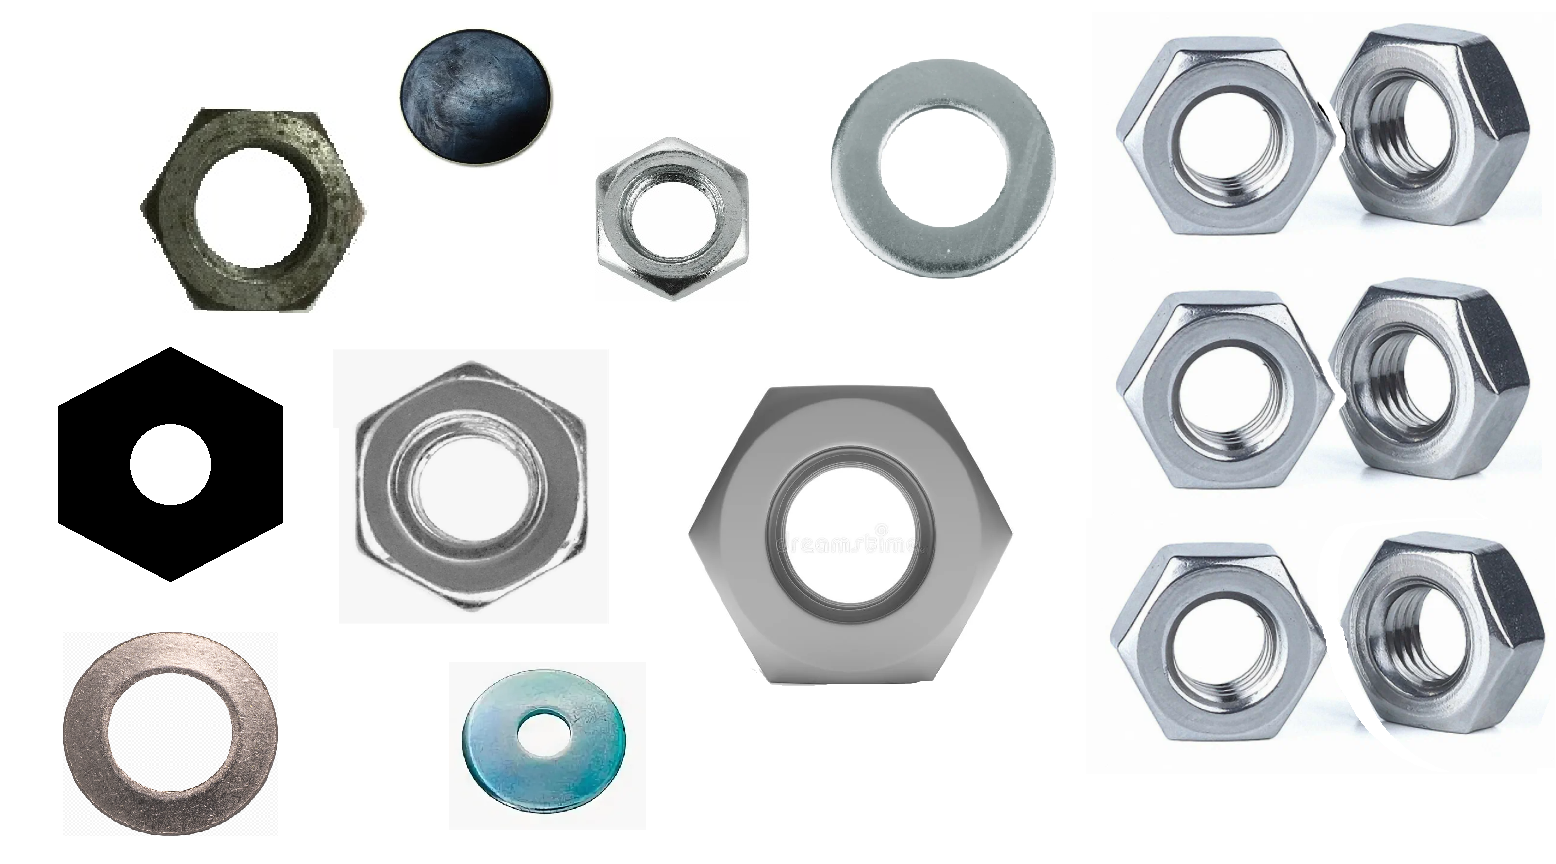

In [ ]:
image = cv2.imread('gaika.png')
imageC = cv2.imread('gaika.png')
cv2_imshow(image)

## Метод 1. Использование контуров для нахождения и подсчёта гаек и шайб.

### Обработка изображений для поиска гаек:

In [ ]:
img = cv2.imread('gaika.png')
imgShapes = cv2.imread('gaika.png')
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bl = cv2.medianBlur(imgGrey, 5)
pyrMean = cv2.pyrMeanShiftFiltering(img,20,40)
canny = cv2.Canny(pyrMean, 100, 250)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.dilate(canny, kernel, iterations=1)
contours1 = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

### Обработанное изображение для поиска гаек:

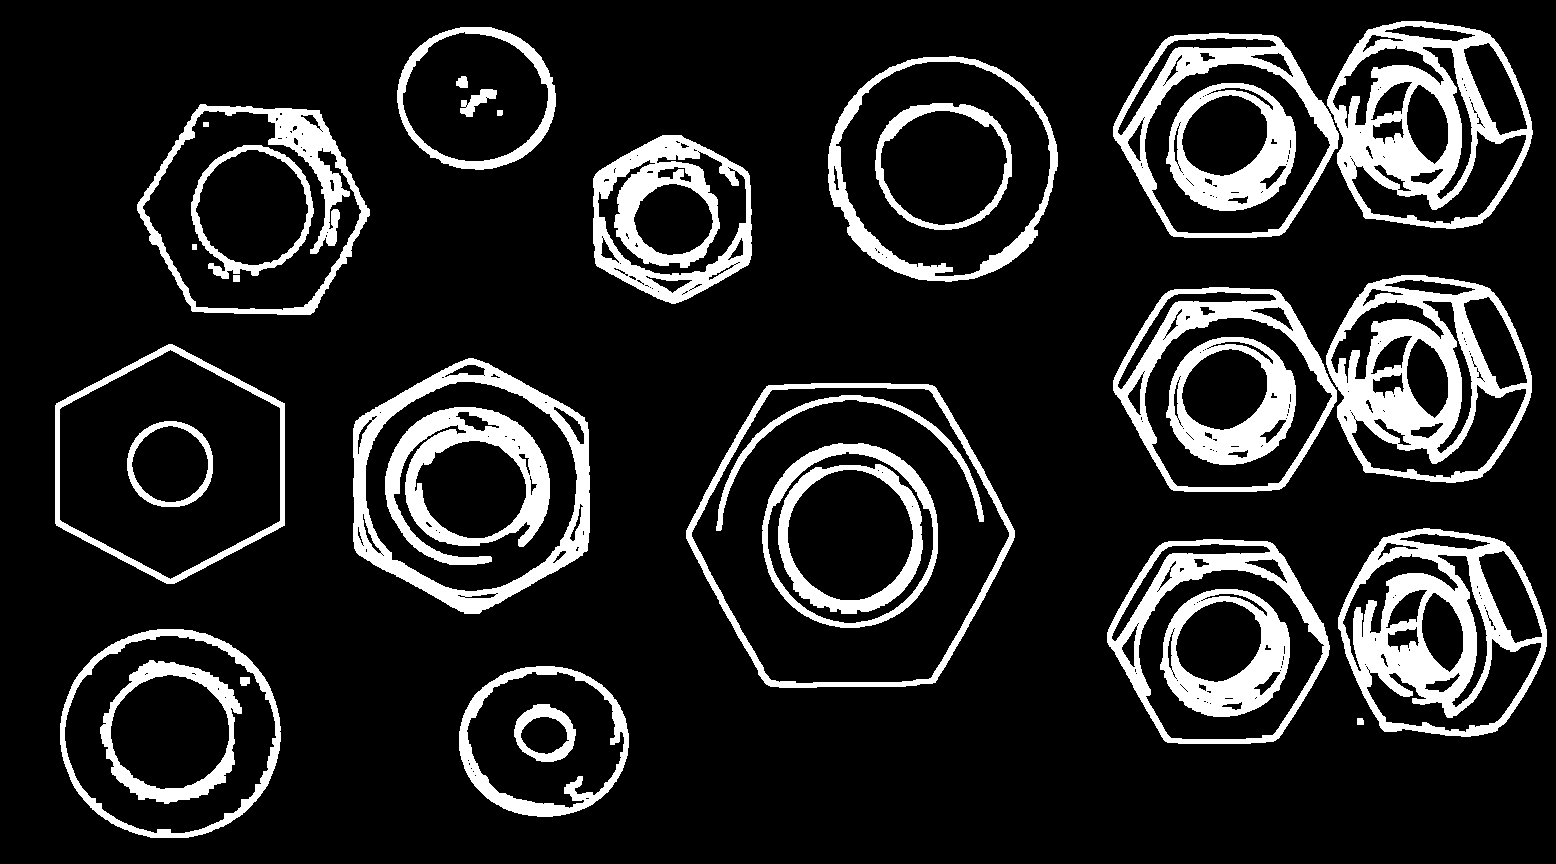

In [ ]:
cv2_imshow(closed)

### Обработка изображений для поиска шайб:

In [ ]:
_, thrash = cv2.threshold(imgGrey, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


### Обработанное изображение для поиска шайб:

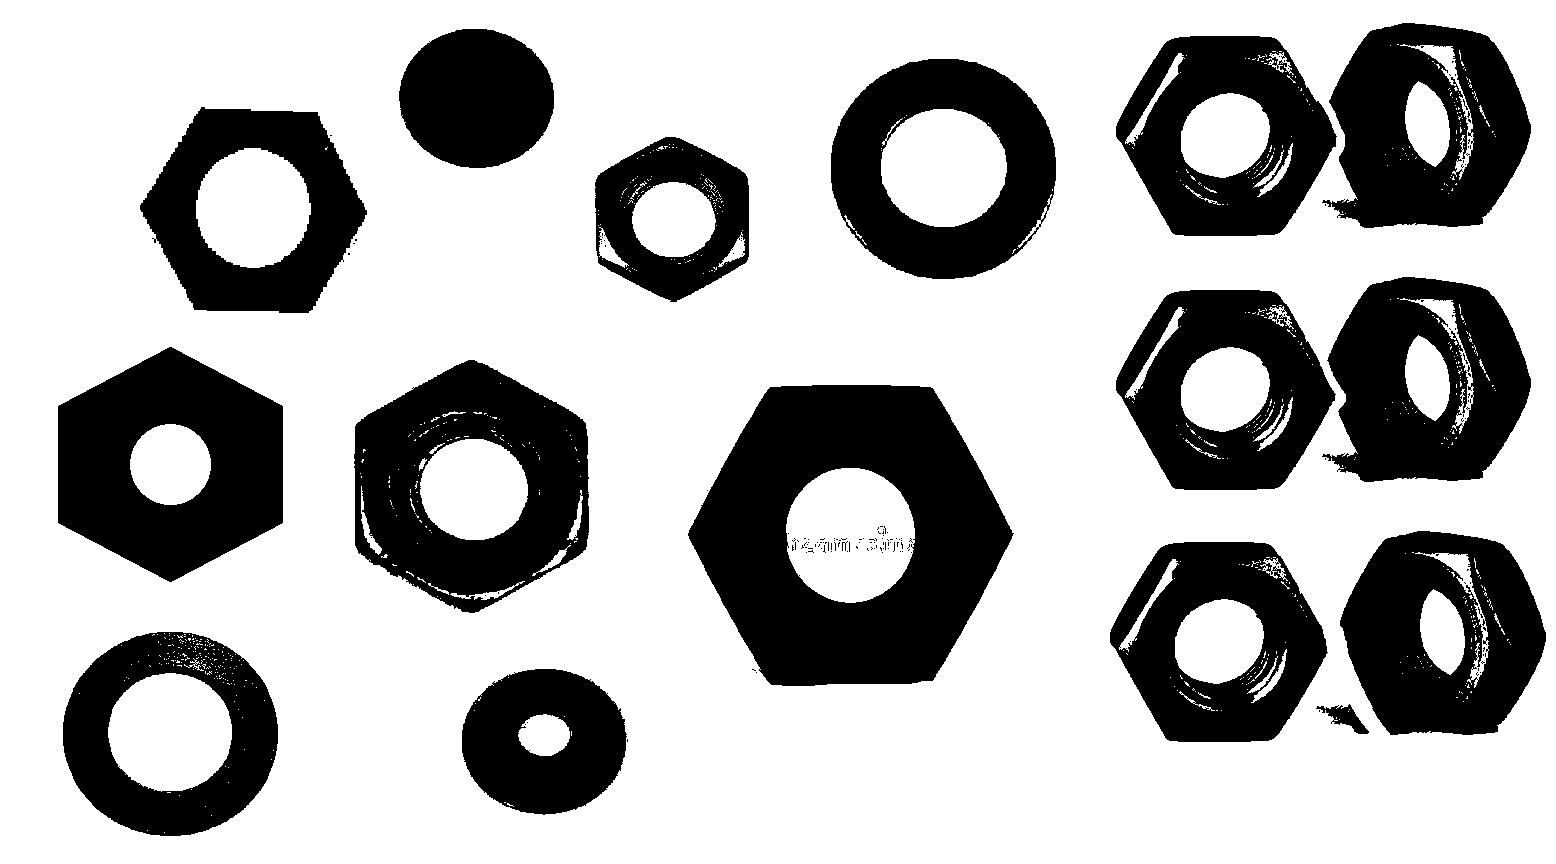

In [ ]:
cv2_imshow(thrash)

### Объявление счётчиков для подсчёта гаек и шайб:

In [ ]:
centerCircleX = []
centerCircleY = []
centerHexX = []
centerHexY = []
areaCircle = []
gaikaCount = 0
shaibaCount = 0

### Поиск необходимых параметров для нахождения гаек:

In [ ]:
for contour in contours1:
    area = cv2.contourArea(contour)
    if area < 100000:
        if area>1000:
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
            x = approx.ravel()[0]
            y = approx.ravel()[1] - 5
            if len(approx) == 3:
                cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            elif len(approx) == 4:
                x1 ,y1, w, h = cv2.boundingRect(approx)
                aspectRatio = float(w)/h
                print(aspectRatio)
                if aspectRatio >= 0.95 and aspectRatio <= 1.05:
                  cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
                else:
                  cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            elif len(approx) == 5:
                cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            elif len(approx) == 6:
                cv2.putText(imgShapes, "Hexagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
                cv2.drawContours(imgShapes, [approx], 0, (0, 0, 0), 5)
                centerHexX.append(cX)
                centerHexY.append(cY)

            elif len(approx) == 10:
                cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            else:
                cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

### Поиск дополнительных параметров для гаек и необходимых параметров для нахождения шайб:

In [ ]:
for contour in contours:
    area = cv2.contourArea(contour)
    if area < 100000:
        if area > 1000:
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            approx = cv2.approxPolyDP(contour, 0.02* cv2.arcLength(contour, True), True)
            x = approx.ravel()[0]
            y = approx.ravel()[1] - 5
            if len(approx) == 3:
                cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            elif len(approx) == 4:
                x1, y1, w, h = cv2.boundingRect(approx)
                aspectRatio = float(w) / h
                print(aspectRatio)
                if aspectRatio >= 0.95 and aspectRatio <= 1.05:
                    cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
                else:
                    cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            elif len(approx) == 5:
                cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            elif len(approx) == 6:
                cv2.putText(img, "", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

            else:
                cv2.putText(imgShapes, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
                cv2.drawContours(imgShapes, [approx], 0, (0, 0, 0), 5)
                centerCircleX.append(cX)
                centerCircleY.append(cY)
                areaCircle.append(area)

NameError: ignored

### Вывод всех найденных и распознанных контуров:

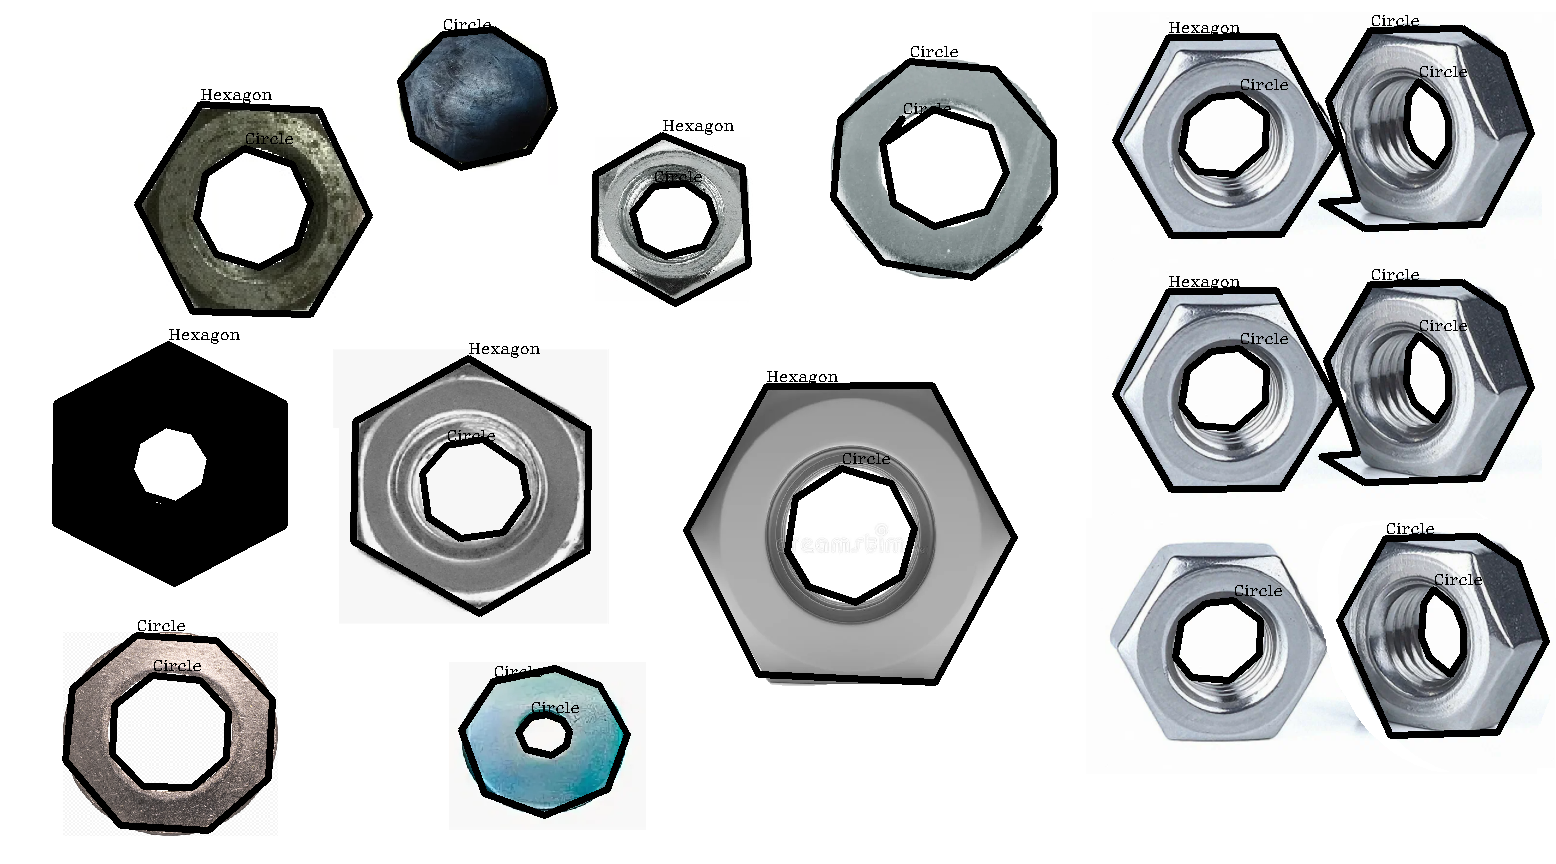

In [ ]:
cv2_imshow(imgShapes)

### Вычисление координат гаек и шайб по полученным данным:

In [ ]:
for i in range(len(centerHexX)):
    for j in range(len(centerCircleX)):
        if abs(centerCircleX[j]-centerHexX[i])<20 and abs(centerCircleY[j]-centerHexY[i])<20:
            cv2.putText(img, "gaika", (centerHexX[i]-10, centerHexY[i]), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            gaikaCount= gaikaCount+1


for i in range(len(centerCircleX)-1):
    if abs(centerCircleX[i]-centerCircleX[i+1])<20 and abs(centerCircleY[i]-centerCircleY[i+1])<20 and abs(areaCircle[i] - areaCircle[i+1])>3000:
        cv2.putText(img, "shaiba", (centerCircleX[i]-10, centerCircleY[i]), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        shaibaCount = shaibaCount+1

### Полученный результат методом 1:

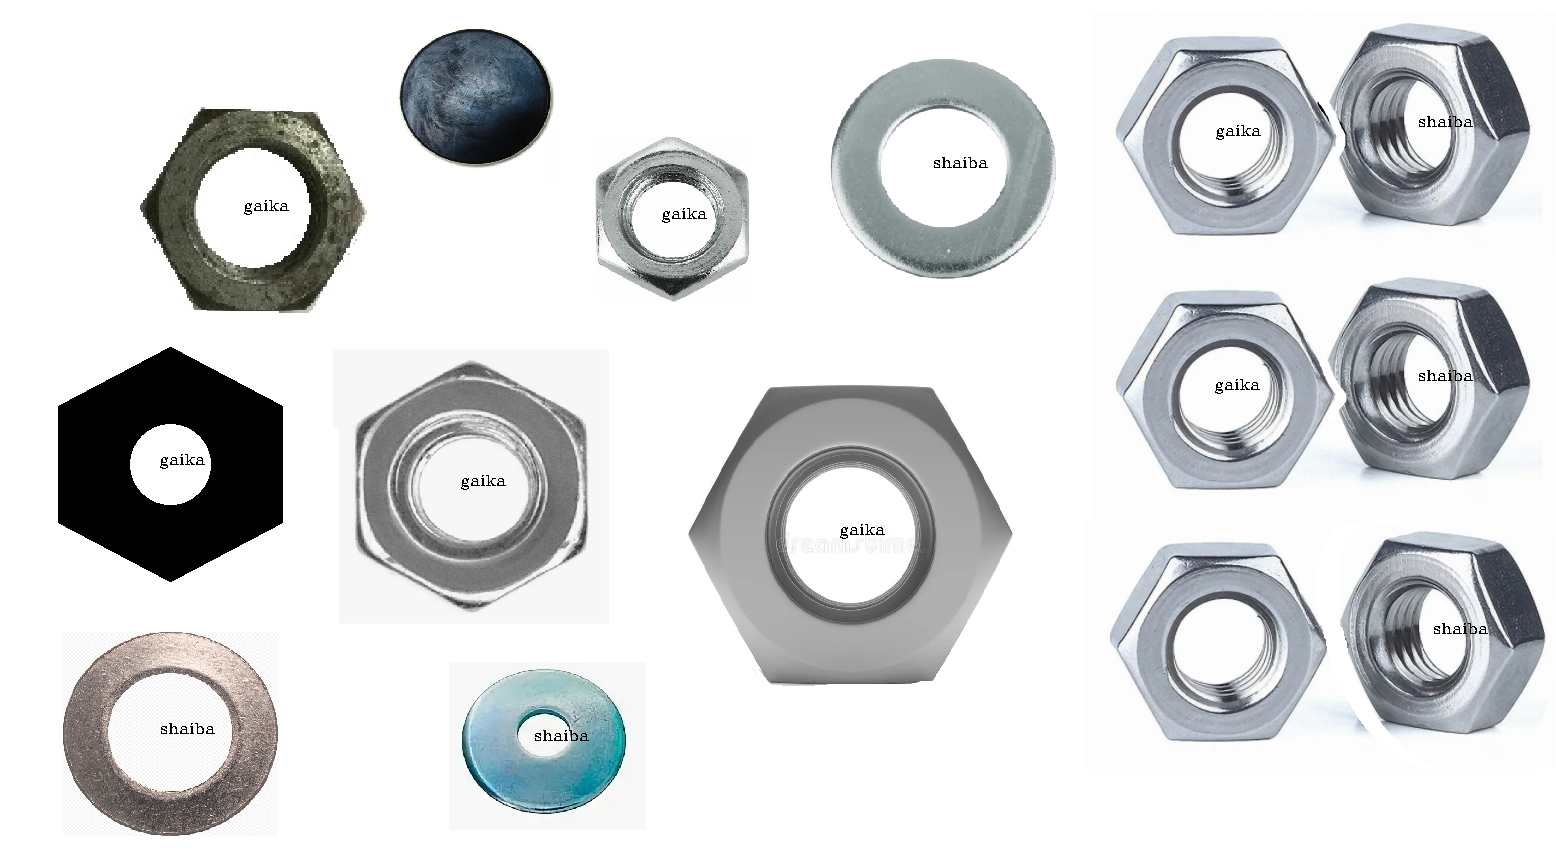

In [ ]:
cv2_imshow(img)

In [ ]:
print("gaikaCount",gaikaCount)
print("shaibaCount",shaibaCount)

gaikaCount 7
shaibaCount 6


Справа шайба не была найдена так как после аппроксимации этот контур не был распознан как шестиугольник

## Поиск методом каскада хаара с тренировкой гайках

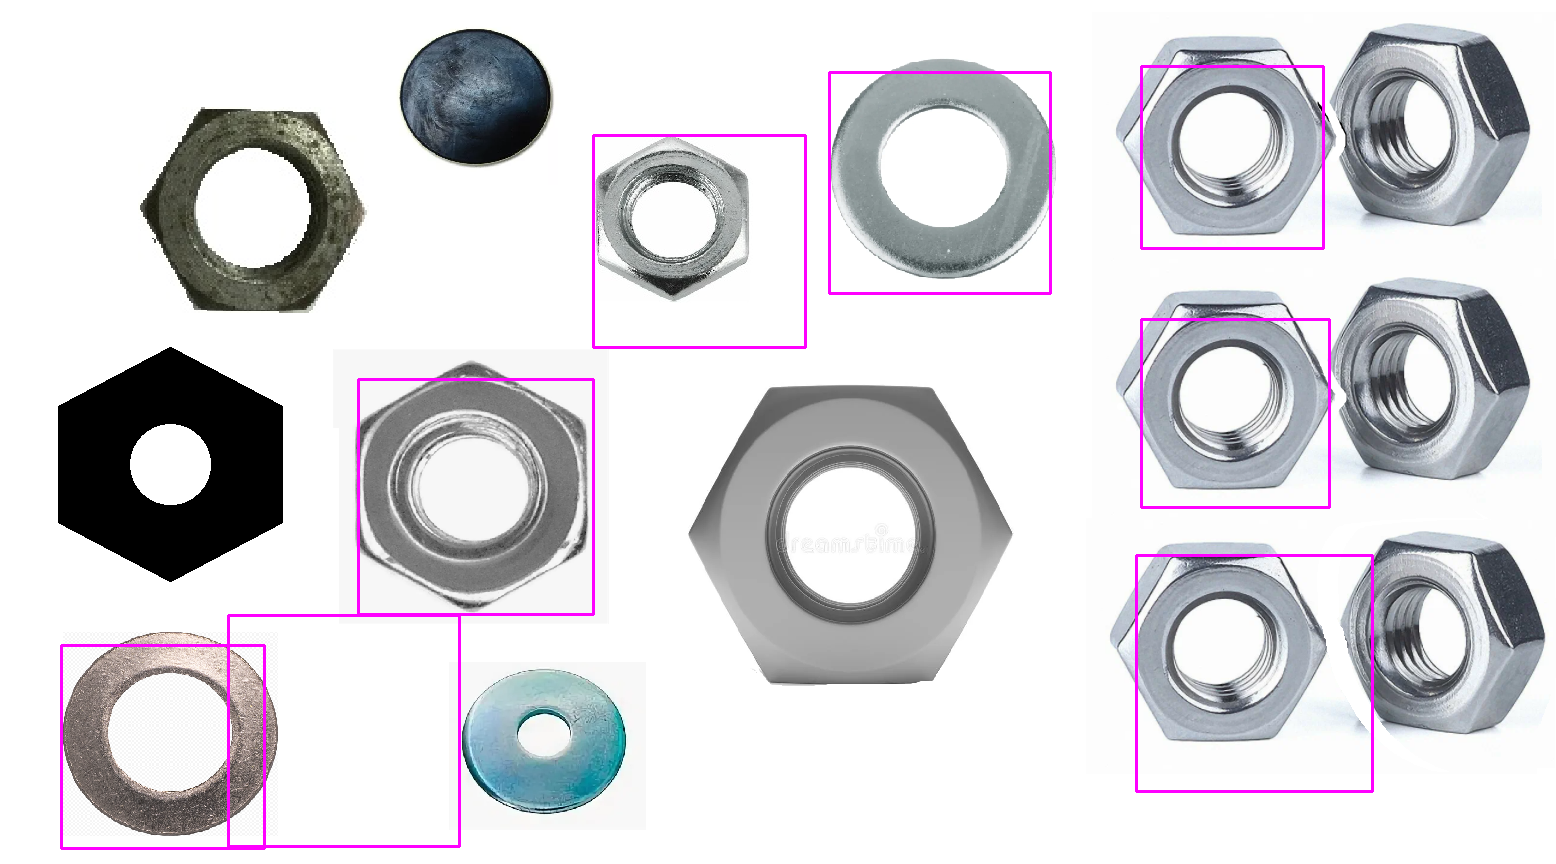

Количество контуров: 8


In [ ]:
face_cascade = cv2.CascadeClassifier("cascade.xml")

img = imageC
img = np.array(img)
img_faces = img
total = 0
# Получаем координаты квадрата с помощью Haar Cascade
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
faces = face_cascade.detectMultiScale(gray,minSize = (180,180), maxSize = (250,250))
# рисуем квадраты на изображении
for (x,y,w,h) in faces:
  img_faces = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
  total += 1

cv2_imshow(img_faces) #56
print("Количество контуров: " + str(total))

Как видно из результатов каскад хаара определяет и гайки и шайбы, хотя обучение было только на изображениях гаек. 

При обучении на 2 типах объектов положительного результата добиться не удалось.

## HoughCircles



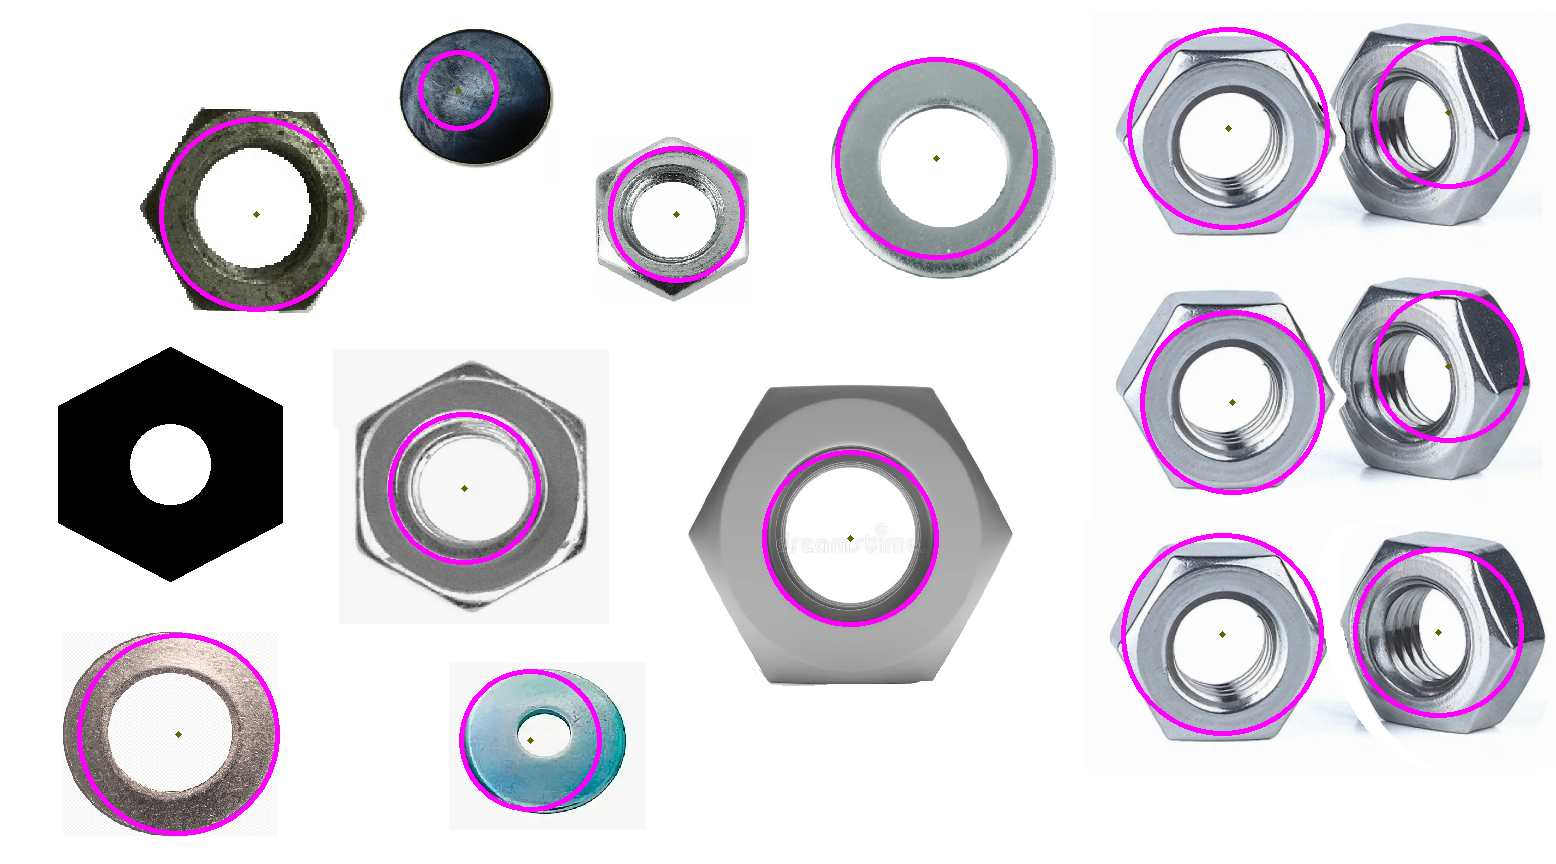

In [ ]:
img2 = cv2.imread('gaika.png')
imgGrey2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

rows = imgGrey2.shape[0]
circles = cv2.HoughCircles(imgGrey2, cv2.HOUGH_GRADIENT, 1, rows / 4,
                               param1=50, param2=20,
                               minRadius=5, maxRadius=100)
centerCircleXX =[]
centerCircleYY =[]
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            centerCircleXX.append(i[0])
            centerCircleYY.append(i[1])
            # circle center
            cv2.circle(img2, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img2, center, radius, (255, 0, 255), 3)
cv2_imshow(img2)

Как видно из результатов преобразования Хафа - этот метод можно использовать для определения центров у гаек, так как он работает очень даже корректно и не распознал только один круг. Для определения шайб этот метод не совсем корректен так как координаты кругов не совсем корректны для успешного определения шайб.

Использование координат круга из преобразования Хаафа для определения гаек:

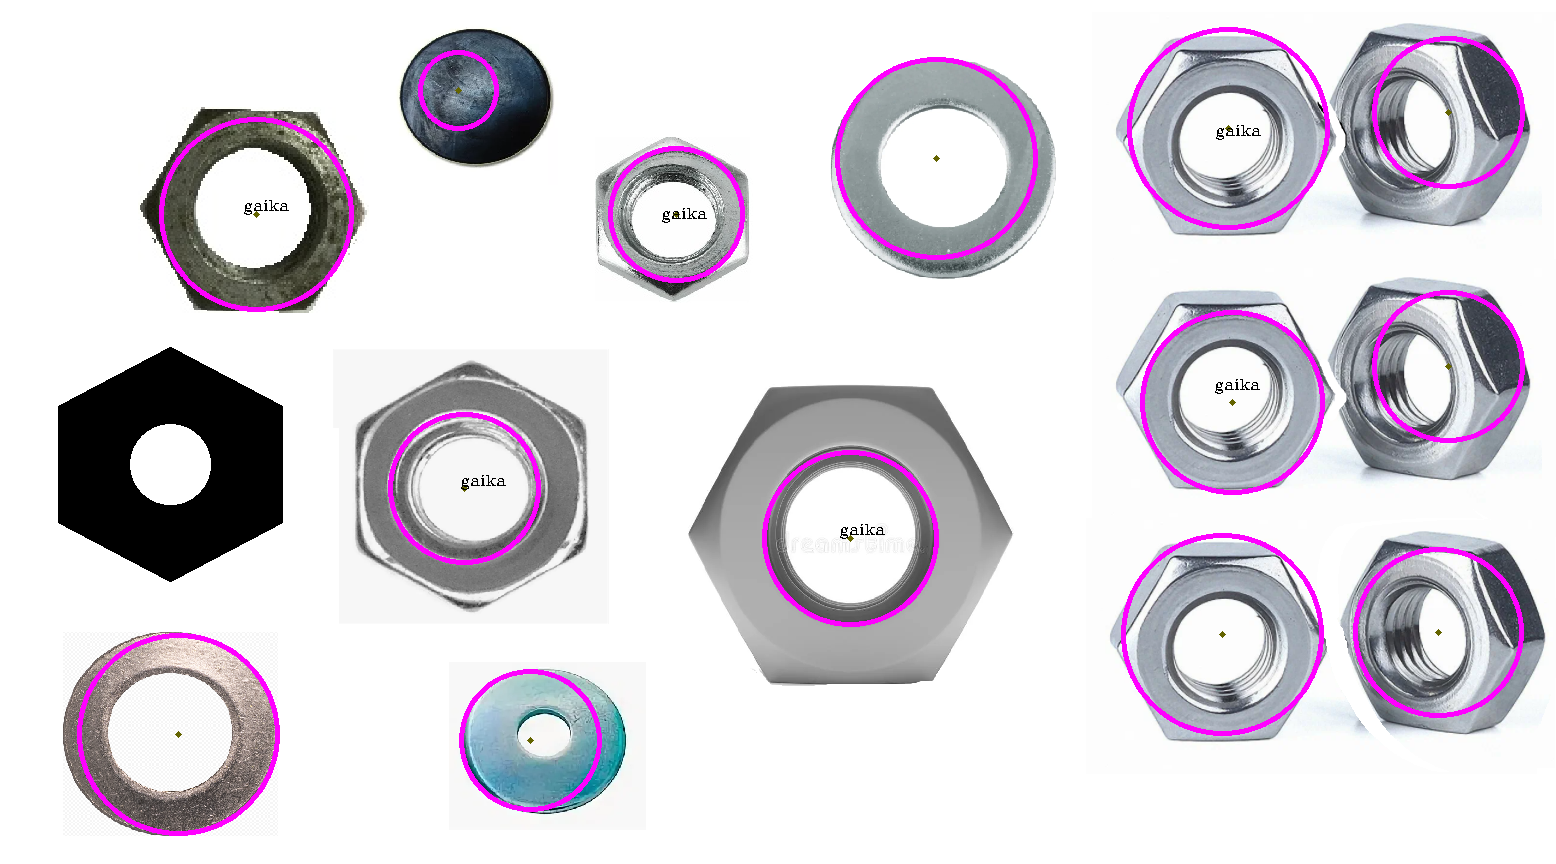

In [ ]:
for i in range(len(centerHexX)):
    for j in range(len(centerCircleXX)):
        if abs(centerCircleXX[j]-centerHexX[i])<20 and abs(centerCircleYY[j]-centerHexY[i])<20:
            cv2.putText(img2, "gaika", (centerHexX[i]-10, centerHexY[i]), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            
cv2_imshow(img2)

Найдено гаек: 6 из 11 существующих

# Выводы: 

Как видно из результатов каскад хаара определяет элемент гораздо хуже, чем контурами. Каскад хаара не определяет почти половину объектов и определяет пустоту как искомый объект. 7 объектов из 14(50%). Найдено гаек: найдено шайб: 5 из 11 возможных(45.5%), найдено гаек: 2 из 3 возможных(66.6%).

Метод поиска контурами работает лучше, но имеет погрешность ввиде гаек под углом(они определяются как шайбы). Найдено гаек: 7 из 11 возможных(63.6%). Найдено шайб: 6 из 3 возможных(200%).

Метод поиска HoughCircles вместе с контурами который очень хорошо определяет внутренние круги в гайках. Поиск шайб невозможен. Найдено гаек: 6 из 11 возможных(54.5%).